# Comparison of longest common subsequence (LCS) algorithms

This notebooks compares longest common subsequence (LCS) algorithms:

- Brute-force: generate combinations of subseqences and check if they are common subsequences.
- Dynamic programming: take advantage of common subproblems to not evaluate the same subsequence more than once.
- Hirschbger's linear space: a dynamic programming approach that uses significantly less memory.

The comparison measures:

- Runtime efficiency: how long does it take to find the LCS.
- Memory efficiency: how much memory is used to find the LCS.

## Problem description

>> Add here the problem description and references.

## Notebook structure

>>> Describe here the structure of the notebook

## Sanity check and initialization

Check that the algorithms work by testing them against controlled input.

There are three part to the tests:

1. Automated tests that check against well-defined inputs. They are meant to be easy to debug, in case an algorithm fails.
1. Tests with longer inputs that simular DNA strands. They test more realistic scenarios, but still short enough to run fast.
1. A visual check, by printing the aligned subsequence. They guard against the test code itself having a failure that generates false positives.

In [1]:
import lcs_test

lcs_test.test(visualize=True)

All basic tests passed
All DNA tests passed
Visual inspection:
                         lcs_brute_force:  AAGGGGCTTTGAGGCATGGCGAACGAAAAA
                         lcs_brute_force:  AAG...CTT..A...ATGGCG......... size=13
                           lcs_recursive:  AAGGGGCTTTGAGGCATGGCGAACGAAAAA
                           lcs_recursive:  AAG...CTT..A...ATGGCG......... size=13
            lcs_dynamic_programming_dict:  AAGGGGCTTTGAGGCATGGCGAACGAAAAA
            lcs_dynamic_programming_dict:  AAG...CTT..A..C.TGGCG......... size=13
   lcs_dynamic_programming_matrix_python:  AAGGGGCTTTGAGGCATGGCGAACGAAAAA
   lcs_dynamic_programming_matrix_python:  AAG...CTT..A...ATGGCG......... size=13
    lcs_dynamic_programming_matrix_numpy:  AAGGGGCTTTGAGGCATGGCGAACGAAAAA
    lcs_dynamic_programming_matrix_numpy:  AAG...CTT..A...ATGGCG......... size=13
                          lcs_hirschberg:  AAGGGGCTTTGAGGCATGGCGAACGAAAAA
                          lcs_hirschberg:  AAG...CTT..A...ATGGCG......... size=13
 

Set a seed to make pseudo-random generator generate the same sequence across runs. This makes it easier to compare different runs of the algorithms.

In [2]:
import random
random.seed(42)

## Tests

To illustrate a real-life scenario, the code checks if a DNA strand is part of
a larger DNA sequence (see [this for an illustration](https://en.wikipedia.org/wiki/Subsequence#Applications)).

In [3]:
import metrics

### Runtime tests and analysis

#### Data collection

In [4]:
rt_results_raw, rt_results_summary = metrics.runtime(verbose=1)


Brute force:1/2,2/2,
Dynamic programming NumPy:1/2,2/2,
Hirschberg NumPy:1/2,2/2,
Brute force:1/2,2/2,
Dynamic programming NumPy:1/2,2/2,
Hirschberg NumPy:1/2,2/2,

In [5]:
display(rt_results_raw)

,Algorithm,Sequence size,Subsequence size,Test number,Runtime (s)
0,Brute force,1000,100,1,0.000124
1,Brute force,1000,100,2,0.000079
2,Dynamic programming NumPy,1000,100,1,0.018288
3,Dynamic programming NumPy,1000,100,2,0.017261
4,Hirschberg NumPy,1000,100,1,0.041801
5,Hirschberg NumPy,1000,100,2,0.040951
6,Brute force,10000,1000,1,0.001147
7,Brute force,10000,1000,2,0.001517
8,Dynamic programming NumPy,10000,1000,1,1.634036
9,Dynamic programming NumPy,10000,1000,2,1.594467


In [6]:
display(rt_results_summary.sort_values(by=[metrics.DF_SEQ_SIZE,
    metrics.DF_SUBSEQ_SIZE]))

,Algorithm,Sequence size,Subsequence size,Runtime (s)
0,Brute force,1000,100,0.000101
2,Dynamic programming NumPy,1000,100,0.017774
4,Hirschberg NumPy,1000,100,0.041376
1,Brute force,10000,1000,0.001332
3,Dynamic programming NumPy,10000,1000,1.614251
5,Hirschberg NumPy,10000,1000,3.251862


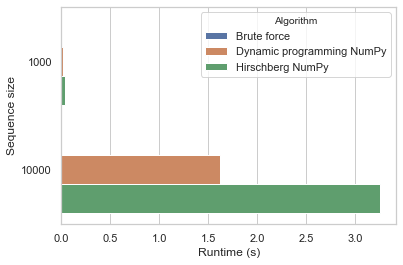

In [7]:
import seaborn as sns
sns.set(style='whitegrid')
sns.barplot(data=rt_results_summary, y=metrics.DF_SEQ_SIZE, x=metrics.DF_RUNTIME,
     hue=metrics.DF_ALGORITHM,orient='h');

### Memory usage and analysis

In [8]:
mem_results_raw, mem_results_summary = metrics.memory(verbose=1)


Brute force:1/2,2/2,
Dynamic programming NumPy:1/2,2/2,
Hirschberg NumPy:1/2,2/2,
Brute force:1/2,2/2,
Dynamic programming NumPy:1/2,2/2,
Hirschberg NumPy:1/2,2/2,

In [9]:
display(mem_results_raw)

,Algorithm,Sequence size,Subsequence size,Test number,Memory (KiB),Runtime (s)
0,Brute force,1000,100,1,0.003906,0.052062
1,Brute force,1000,100,2,0.003906,0.040800
2,Dynamic programming NumPy,1000,100,1,-0.566406,0.050396
3,Dynamic programming NumPy,1000,100,2,0.386719,0.056178
4,Hirschberg NumPy,1000,100,1,0.000000,0.046742
5,Hirschberg NumPy,1000,100,2,0.000000,0.046795
6,Brute force,10000,1000,1,0.000000,0.051485
7,Brute force,10000,1000,2,0.015625,0.046276
8,Dynamic programming NumPy,10000,1000,1,0.000000,1.695500
9,Dynamic programming NumPy,10000,1000,2,0.000000,1.674665


In [10]:
display(mem_results_summary)

,Algorithm,Sequence size,Subsequence size,Memory (KiB),Runtime (s)
0,Brute force,1000,100,0.003906,0.046431
1,Brute force,10000,1000,0.007812,0.048881
2,Dynamic programming NumPy,1000,100,0.386719,0.056178
3,Dynamic programming NumPy,10000,1000,0.000000,1.685083
4,Hirschberg NumPy,1000,100,0.000000,0.046769
5,Hirschberg NumPy,10000,1000,0.001953,3.248074


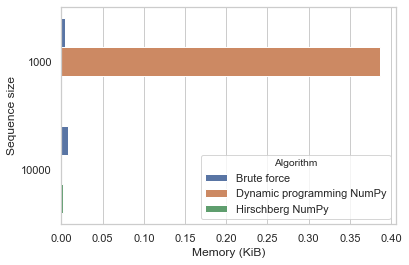

In [11]:
sns.barplot(data=mem_results_summary, y=metrics.DF_SEQ_SIZE, x=metrics.DF_MEMORY,
     hue=metrics.DF_ALGORITHM,orient='h');

## References

| <!-- -->    | <!-- -->    |
|-------------|-------------|
| 1  | CLRS  |